<a href="https://colab.research.google.com/github/enitin-agarwal/azureforaws/blob/master/SelfLearningTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####Data from MimicIII discharge summary
#Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

auth.authenticate_user()
print('Authenticated')

# Initialize BigQuery Client
client = bigquery.Client(project='physionet-data')

# load the dataset list
datasets = client.list_datasets()


Authenticated


In [ ]:
%%bigquery --project ultimate-balm-449016-q6

# Directly embed the query for notes

SELECT
    n.SUBJECT_ID,
    n.HADM_ID,
    n.TEXT,
    n.CATEGORY,
    a.ICD9_CODE
FROM `physionet-data.mimiciii_notes.noteevents` AS n
INNER JOIN `physionet-data.mimiciii_demo.diagnoses_icd` AS a
ON n.SUBJECT_ID = a.SUBJECT_ID AND n.HADM_ID = a.HADM_ID
WHERE n.CATEGORY = 'Discharge summary'

AND (
       -- Cancer Codes
    (a.ICD9_CODE BETWEEN '140' AND '239')
   );

Query is running:   0%|          |

Downloading:   0%|          |

,SUBJECT_ID,HADM_ID,TEXT,CATEGORY,ICD9_CODE
0,43909,167612,Admission Date: [**2152-10-9**] ...,Discharge summary,1983
1,43909,167612,Admission Date: [**2152-10-9**] ...,Discharge summary,1628
2,40595,116518,Admission Date: [**2144-10-15**] ...,Discharge summary,1629
3,10117,105150,Admission Date: [**2138-11-9**] Discharge...,Discharge summary,20300
4,43881,167021,Admission Date: [**2104-10-24**] ...,Discharge summary,1508
...,...,...,...,...,...
82,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1976
83,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1961
84,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1965
85,10130,156668,Admission Date: [**2161-1-30**] Discharge...,Discharge summary,1977


In [ ]:
disease_patients_df = _
display(disease_patients_df)

,SUBJECT_ID,HADM_ID,TEXT,CATEGORY,ICD9_CODE
0,43909,167612,Admission Date: [**2152-10-9**] ...,Discharge summary,1983
1,43909,167612,Admission Date: [**2152-10-9**] ...,Discharge summary,1628
2,40595,116518,Admission Date: [**2144-10-15**] ...,Discharge summary,1629
3,10117,105150,Admission Date: [**2138-11-9**] Discharge...,Discharge summary,20300
4,43881,167021,Admission Date: [**2104-10-24**] ...,Discharge summary,1508
...,...,...,...,...,...
82,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1976
83,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1961
84,40687,129273,Admission Date: [**2155-3-8**] D...,Discharge summary,1965
85,10130,156668,Admission Date: [**2161-1-30**] Discharge...,Discharge summary,1977


In [ ]:
%%bigquery --project ultimate-balm-449016-q6

# Directly embed the query for notes

SELECT *
FROM `physionet-data.mimiciii_demo.diagnoses_icd`;

Query is running:   0%|          |

Downloading:   0%|          |

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,395980,43779,186071,1,85221
1,395981,43779,186071,2,5849
2,395982,43779,186071,3,1970
3,395983,43779,186071,4,1539
4,395984,43779,186071,5,E8859
...,...,...,...,...,...
1756,388228,41983,107689,12,4240
1757,388229,41983,107689,13,2449
1758,388230,41983,107689,14,53081
1759,388231,41983,107689,15,3669


In [ ]:
icd_df = _
display(icd_df)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,395980,43779,186071,1,85221
1,395981,43779,186071,2,5849
2,395982,43779,186071,3,1970
3,395983,43779,186071,4,1539
4,395984,43779,186071,5,E8859
...,...,...,...,...,...
1756,388228,41983,107689,12,4240
1757,388229,41983,107689,13,2449
1758,388230,41983,107689,14,53081
1759,388231,41983,107689,15,3669


In [ ]:
%%bigquery --project ultimate-balm-449016-q6

# Directly embed the query for notes

SELECT *
FROM `physionet-data.mimiciii_demo.patients`;

Query is running:   0%|          |

Downloading:   0%|          |

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12,2165-08-12,1
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28,NaT,1
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07,2125-10-07,1
3,9478,10017,F,2075-09-21,2152-09-12,NaT,2152-09-12,1
4,9486,10026,F,1895-05-17,2195-11-24,NaT,2195-11-24,1
...,...,...,...,...,...,...,...,...
95,31771,43798,M,2136-07-29,2200-12-31,2200-12-31,2200-12-31,1
96,31790,43881,M,2051-03-24,2105-02-16,2105-02-16,2105-02-16,1
97,31838,44083,M,2057-11-15,2114-02-20,2114-02-20,2114-02-20,1
98,31853,44154,M,1878-05-14,2178-05-15,2178-05-15,2178-05-15,1


In [ ]:
patients_df = _
display(patients_df)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12,2165-08-12,1
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28,NaT,1
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07,2125-10-07,1
3,9478,10017,F,2075-09-21,2152-09-12,NaT,2152-09-12,1
4,9486,10026,F,1895-05-17,2195-11-24,NaT,2195-11-24,1
...,...,...,...,...,...,...,...,...
95,31771,43798,M,2136-07-29,2200-12-31,2200-12-31,2200-12-31,1
96,31790,43881,M,2051-03-24,2105-02-16,2105-02-16,2105-02-16,1
97,31838,44083,M,2057-11-15,2114-02-20,2114-02-20,2114-02-20,1
98,31853,44154,M,1878-05-14,2178-05-15,2178-05-15,2178-05-15,1


In [ ]:
%%bigquery --project ultimate-balm-449016-q6

# Directly embed the query for notes

SELECT *
FROM `physionet-data.mimiciii_demo.admissions`;

Query is running:   0%|          |

Downloading:   0%|          |

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
1,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0,1
2,12283,10033,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,POLI,CATHOLIC,MARRIED,WHITE,2132-12-04 20:11:00,2132-12-05 04:05:00,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,0,1
3,12288,10038,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1
4,12293,10043,168674,2185-04-14 00:23:00,2185-04-26 18:20:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,None,WHITE,2185-04-13 23:01:00,2185-04-14 02:56:00,RESPIRATORY DISTRESS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,12311,10061,145203,2107-01-16 11:33:00,2107-02-10 11:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,None,CATHOLIC,WIDOWED,WHITE,NaT,NaT,CHEST PAIN/ CATH,0,1
125,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaT,NaT,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
126,39869,40310,186361,2144-07-11 15:02:00,2144-11-12 14:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Private,ENGL,CATHOLIC,SINGLE,WHITE,NaT,NaT,FACIAL NUMBNESS,0,1
127,40379,41914,101361,2145-12-01 18:13:00,2145-12-18 17:45:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,ELEVATED LIVER FUNCTIONS;S/P LIVER TRANSPLANT,0,1


In [ ]:
admissions_df = _
display(admissions_df)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
1,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0,1
2,12283,10033,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,POLI,CATHOLIC,MARRIED,WHITE,2132-12-04 20:11:00,2132-12-05 04:05:00,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,0,1
3,12288,10038,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1
4,12293,10043,168674,2185-04-14 00:23:00,2185-04-26 18:20:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,None,CATHOLIC,None,WHITE,2185-04-13 23:01:00,2185-04-14 02:56:00,RESPIRATORY DISTRESS,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,12311,10061,145203,2107-01-16 11:33:00,2107-02-10 11:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,None,CATHOLIC,WIDOWED,WHITE,NaT,NaT,CHEST PAIN/ CATH,0,1
125,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaT,NaT,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
126,39869,40310,186361,2144-07-11 15:02:00,2144-11-12 14:40:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Private,ENGL,CATHOLIC,SINGLE,WHITE,NaT,NaT,FACIAL NUMBNESS,0,1
127,40379,41914,101361,2145-12-01 18:13:00,2145-12-18 17:45:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,ELEVATED LIVER FUNCTIONS;S/P LIVER TRANSPLANT,0,1


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

##########################################
# PART A: PROCESS STRUCTURED MIMIC-III DATA
##########################################

# 1. Load MIMIC-III Structured Data
# Load patients, admissions, and diagnoses ICD files.
#patients_df = pd.read_csv("MIMICIII/PATIENTS.csv")
#admissions_df = pd.read_csv("MIMICIII/ADMISSIONS.csv")
#diagnoses_df = pd.read_csv("MIMICIII/DIAGNOSES_ICD.csv")

# Convert DOB and ADMITTIME to datetime objects.
patients_df['DOB'] = pd.to_datetime(patients_df['DOB'], errors='coerce')
admissions_df['ADMITTIME'] = pd.to_datetime(admissions_df['ADMITTIME'], errors='coerce')

# Merge patients with admissions on SUBJECT_ID.
structured_df = pd.merge(admissions_df, patients_df[['SUBJECT_ID','DOB','GENDER']], on='SUBJECT_ID', how='left')

# Compute Age at admission (in years).
structured_df['Age'] = (structured_df['ADMITTIME'] - structured_df['DOB']).dt.days / 365.25

# Map Gender to numeric (e.g., Male:0, Female:1).
structured_df['Gender'] = structured_df['GENDER'].map({'M': 0, 'F': 1})

# 2. Derive CancerHistory from diagnoses ICD codes.
# Convert ICD9_CODE to string.
icd_df['ICD9_CODE'] = icd_df['ICD9_CODE'].astype(str)
# Define a simple filter for cancer ICD9 codes (e.g., codes starting with numbers 140-239).
cancer_codes_prefixes = tuple(str(code) for code in range(140, 240))
cancer_diag = icd_df[icd_df['ICD9_CODE'].str.startswith(cancer_codes_prefixes)]
# For each SUBJECT_ID, mark CancerHistory as 1 if any cancer diagnosis exists.
cancer_history = cancer_diag.groupby('SUBJECT_ID').size().reset_index(name='count')
cancer_history['CancerHistory'] = 1
structured_df = pd.merge(structured_df, cancer_history[['SUBJECT_ID', 'CancerHistory']], on='SUBJECT_ID', how='left')
structured_df['CancerHistory'] = structured_df['CancerHistory'].fillna(0)

# 3. Select One Admission per Patient.
# Here, we sort by admission time and choose the first admission per patient.
structured_df = structured_df.sort_values('ADMITTIME').groupby('SUBJECT_ID').first().reset_index()

# 4. Select Structured Features.
# For this example, we use Age, Gender, and CancerHistory.
structured_features = ['Age', 'Gender', 'CancerHistory']
print("Structured features sample:")
print(structured_df[["SUBJECT_ID"] + structured_features].head())

##########################################
# PART B: PROCESS DISCHARGE SUMMARIES (TEXT)
##########################################

# 1. Load Discharge Summaries from NOTEEVENTS.
notes_df = disease_patients_df
#notes_df = pd.read_csv("MIMICIII/NOTEEVENTS.csv")

# Filter for discharge summaries.
discharge_df = notes_df[notes_df['CATEGORY'] == "Discharge summary"]

# For each patient, select the first discharge summary.
discharge_first = discharge_df.groupby("SUBJECT_ID")["TEXT"].first().reset_index()
print("Sample discharge summaries:")
print(discharge_first.head())

# 2. Compute Text Embeddings Using a Pre-trained Model.
text_model = SentenceTransformer('all-MiniLM-L6-v2')
# Compute an embedding for each discharge summary.
discharge_first["embedding"] = discharge_first["TEXT"].apply(lambda x: text_model.encode(x))

# Expand embeddings into individual columns.
embedding_dim = len(discharge_first["embedding"].iloc[0])
embedding_cols = [f"embed_{i}" for i in range(embedding_dim)]
embedding_matrix = np.vstack(discharge_first["embedding"].values)
discharge_embeddings = pd.DataFrame(embedding_matrix, columns=embedding_cols)
discharge_embeddings["SUBJECT_ID"] = discharge_first["SUBJECT_ID"]

print("Discharge embeddings shape:", discharge_embeddings.shape)

##########################################
# PART C: MERGE STRUCTURED DATA WITH TEXT EMBEDDINGS
##########################################

# Merge the structured data with discharge embeddings on SUBJECT_ID.
mimic_merged = pd.merge(structured_df, discharge_embeddings, on="SUBJECT_ID", how="left")
# For patients missing discharge summaries, fill embedding columns with zeros.
for col in embedding_cols:
    mimic_merged[col] = mimic_merged[col].fillna(0)

# For demonstration, assume the outcome variable (Diagnosis) is available in MIMIC-III.
# In practice, this might come from a clinical label extraction process.
# Here we simulate a binary diagnosis label.
np.random.seed(42)
mimic_merged["Diagnosis"] = np.random.randint(0, 2, size=mimic_merged.shape[0])

print("Merged MIMIC dataset shape:", mimic_merged.shape)
print(mimic_merged.head())

# Combine structured features and text embeddings.
all_features = structured_features + embedding_cols

##########################################
# PART D: PREPARE DATA AND TRAIN A MULTIMODAL MODEL
##########################################

# 1. Prepare input (X) and target (y) arrays.
X_mimic = mimic_merged[all_features].values.astype(np.float32)
y_mimic = mimic_merged["Diagnosis"].values.astype(np.int64)

# 2. Create PyTorch tensors and DataLoader.
X_mimic_tensor = torch.tensor(X_mimic)
y_mimic_tensor = torch.tensor(y_mimic)
mimic_dataset = TensorDataset(X_mimic_tensor, y_mimic_tensor)
mimic_loader = DataLoader(mimic_dataset, batch_size=32, shuffle=True)

# 3. Define the Multimodal Model.
# The model has two branches: one for structured features and one for text embeddings.
class MultiModalModel(nn.Module):
    def __init__(self, structured_input_dim, text_input_dim, num_classes=2):
        super(MultiModalModel, self).__init__()
        # Structured branch.
        self.structured_branch = nn.Sequential(
            nn.Linear(structured_input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3)
        )
        # Text branch.
        self.text_branch = nn.Sequential(
            nn.Linear(text_input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3)
        )
        # Fusion and classification layers.
        self.fusion = nn.Sequential(
            nn.Linear(64 + 64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        # Split input into structured and text parts.
        structured_input = x[:, :len(structured_features)]
        text_input = x[:, len(structured_features):]
        structured_out = self.structured_branch(structured_input)
        text_out = self.text_branch(text_input)
        # Concatenate both branches.
        combined = torch.cat((structured_out, text_out), dim=1)
        output = self.fusion(combined)
        return output

# Instantiate the multimodal model.
multi_model = MultiModalModel(structured_input_dim=len(structured_features),
                              text_input_dim=len(embedding_cols),
                              num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(multi_model.parameters(), lr=0.001)

# 4. Train the multimodal model.
num_epochs = 10  # Increase epochs as needed for real training.
for epoch in range(num_epochs):
    multi_model.train()
    running_loss = 0.0
    for X_batch, y_batch in mimic_loader:
        optimizer.zero_grad()
        outputs = multi_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)
    print(f"Multimodal Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(mimic_dataset):.4f}")

##########################################
# PART E: (OPTIONAL) TRANSFER LEARNING TO A MAIN DATASET
##########################################

# If you have a main dataset that contains only structured features (and no discharge summaries),
# you can transfer the learned structured branch from the multimodal model.
# For example, load a main dataset from MIMIC-III structured data (using the same features as above).

# For demonstration, we use the structured part of mimic_merged.
main_df = mimic_merged.copy()  # In practice, this would be your separate main dataset.
X_main = main_df[structured_features].values.astype(np.float32)
y_main = main_df["Diagnosis"].values.astype(np.int64)

# Create tensors and DataLoader for the main dataset.
X_main_tensor = torch.tensor(X_main)
y_main_tensor = torch.tensor(y_main)
main_dataset = TensorDataset(X_main_tensor, y_main_tensor)
main_loader = DataLoader(main_dataset, batch_size=32, shuffle=True)

# Define a structured-only model.
class StructuredModel(nn.Module):
    def __init__(self, structured_input_dim, num_classes=2):
        super(StructuredModel, self).__init__()
        self.structured_branch = nn.Sequential(
            nn.Linear(structured_input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3)
        )
        self.fc_out = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        out = self.structured_branch(x)
        out = self.fc_out(out)
        return out

structured_model = StructuredModel(structured_input_dim=len(structured_features), num_classes=2)
# Transfer weights from the multimodal model's structured branch.
structured_model.structured_branch.load_state_dict(multi_model.structured_branch.state_dict())

criterion_main = nn.CrossEntropyLoss()
optimizer_main = optim.Adam(structured_model.parameters(), lr=0.001)

# Fine-tune the structured model on the main dataset.
num_epochs_main = 10
for epoch in range(num_epochs_main):
    structured_model.train()
    running_loss = 0.0
    for X_batch, y_batch in main_loader:
        optimizer_main.zero_grad()
        outputs = structured_model(X_batch)
        loss = criterion_main(outputs, y_batch)
        loss.backward()
        optimizer_main.step()
        running_loss += loss.item() * X_batch.size(0)
    print(f"Main Dataset Epoch {epoch+1}/{num_epochs_main}, Loss: {running_loss / len(main_dataset):.4f}")

# structured_model now benefits from the richer representation learned from the multimodal training.



Structured features sample:
   SUBJECT_ID        Age  Gender  CancerHistory
0       10006  70.633812       1            0.0
1       10011  36.188912       1            0.0
2       10013  87.082820       1            1.0
3       10017  73.675565       1            0.0
4       10019  48.898015       0            0.0
Sample discharge summaries:
   SUBJECT_ID                                               TEXT
0       10013  Admission Date:  [**2125-10-4**]       Dischar...
1       10029  Admission Date:  [**2139-9-22**]              ...
2       10032  Admission Date:  [**2138-4-2**]       Discharg...
3       10044  Admission Date:  [**2152-10-2**]       Dischar...
4       10046  Name:  [**Known lastname 6437**], [**Known fir...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Discharge embeddings shape: (31, 385)
Merged MIMIC dataset shape: (100, 409)
   SUBJECT_ID  ROW_ID  HADM_ID           ADMITTIME           DISCHTIME  \
0       10006   12258   142345 2164-10-23 21:09:00 2164-11-01 17:15:00   
1       10011   12263   105331 2126-08-14 22:32:00 2126-08-28 18:59:00   
2       10013   12265   165520 2125-10-04 23:36:00 2125-10-07 15:13:00   
3       10017   12269   199207 2149-05-26 17:19:00 2149-06-03 18:42:00   
4       10019   12270   177759 2163-05-14 20:43:00 2163-05-15 12:00:00   

            DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0                 NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
1 2126-08-28 18:59:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
2 2125-10-07 15:13:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                 NaT      EMERGENCY       EMERGENCY ROOM ADMIT   
4 2163-05-15 12:00:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

  DISCHARGE_LOCATION INSURANCE  ... embed_375 embed_376 embed_377 embed_378

<ipython-input-11-39e25bedc22b>:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mimic_merged["Diagnosis"] = np.random.randint(0, 2, size=mimic_merged.shape[0])


Multimodal Epoch 1/10, Loss: 0.8433
Multimodal Epoch 2/10, Loss: 0.6947
Multimodal Epoch 3/10, Loss: 0.6528
Multimodal Epoch 4/10, Loss: 0.6628
Multimodal Epoch 5/10, Loss: 0.7695
Multimodal Epoch 6/10, Loss: 0.6857
Multimodal Epoch 7/10, Loss: 0.6597
Multimodal Epoch 8/10, Loss: 0.6124
Multimodal Epoch 9/10, Loss: 0.6658
Multimodal Epoch 10/10, Loss: 0.6134
Main Dataset Epoch 1/10, Loss: 0.7815
Main Dataset Epoch 2/10, Loss: 0.7040
Main Dataset Epoch 3/10, Loss: 0.7720
Main Dataset Epoch 4/10, Loss: 0.7342
Main Dataset Epoch 5/10, Loss: 0.7331
Main Dataset Epoch 6/10, Loss: 0.6828
Main Dataset Epoch 7/10, Loss: 0.7222
Main Dataset Epoch 8/10, Loss: 0.6685
Main Dataset Epoch 9/10, Loss: 0.7568
Main Dataset Epoch 10/10, Loss: 0.7188


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, f1_score
)
from imblearn.over_sampling import SMOTE  # For handling class imbalance

# ---------------------------
# 1. Dataset Download & Preprocessing
# ---------------------------
# This section downloads the dataset, loads it into memory, and prepares it for training a neural network.

import kagglehub

# Download the cancer prediction dataset from KaggleHub and retrieve the directory path
path = kagglehub.dataset_download("rabieelkharoua/cancer-prediction-dataset")
print("Path to dataset files:", path)

# Specify the full path to the CSV file containing the data
csv_file = os.path.join(path, "The_Cancer_data_1500_V2.csv")

# Load the dataset into a Pandas DataFrame for easy manipulation
df = pd.read_csv(csv_file)

# Remove any rows with missing values to ensure data quality and prevent errors during training
df = df.dropna()

# Download latest version
path = kagglehub.dataset_download("cdc/behavioral-risk-factor-surveillance-system")

print("Path to dataset files:", path)


# List all files and directories in the specified path
file_list = os.listdir(path)
# Print the list of files
for file_name in file_list:
    print(file_name)


for filename in os.listdir(path):
    filepath = os.path.join(path, filename)

    if filename.endswith('.csv'):
        print(f"Viewing CSV file: {filename}")
        df_new = pd.read_csv(filepath)
        df_new['Diagnosis'] = np.where(
           (df_new['CHCSCNCR'] == 1) | (df_new['CHCOCNCR'] == 1),
             1, 0
           )
        selected_new = ["_AGE_G","SMOKE100", "_BMI5", "ALCDAY5", "EXERANY2", "Diagnosis"]
        df_new = df_new[selected_new].dropna()
        df_new['Age'] = df_new["_AGE_G"]
        df_new['BMI'] = df_new["_BMI5"]
        df_new['Smoking'] = df_new["SMOKE100"]
        df_new['AlcoholIntake'] = df_new["ALCDAY5"]
        df_new['PhysicalActivity'] = df_new["EXERANY2"]
        df_new['CancerHistory'] = 0
        #df = df_new[["Age", "BMI", "Smoking", "AlcoholIntake", "PhysicalActivity", "CancerHistory"]
        #print(df.head())  # Display the first few rows of the CSV
        print("New dataset columns:", df_new.columns)
        print("\n")

    #elif filename.endswith('.json'):
     #   print(f"Viewing JSON file: {filename}")
      #  with open(filepath, 'r') as f:
       #     data = json.load(f)
       # print(data)  # Print the JSON data
       # print("\n")

    else:
        print(f"Skipping file: {filename} (not CSV or JSON)")

combined_df = pd.concat([df_new, df], ignore_index=True)


# Define the feature columns (input variables) and target column (output variable)
feature_cols = ['Age', 'BMI', 'Smoking', 'AlcoholIntake', 'PhysicalActivity', 'CancerHistory']
X = combined_df[feature_cols]  # Features: patient characteristics used to predict cancer
y = combined_df['Diagnosis']   # Target: binary label (0 = No Cancer, 1 = Cancer)


100%|██████████| 47.3k/47.3k [00:00<00:00, 30.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/cancer-prediction-dataset/versions/2


100%|██████████| 414M/414M [00:04<00:00, 88.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cdc/behavioral-risk-factor-surveillance-system/versions/1
2011.csv
2015_formats.json
2014.csv
2012.csv
2013.csv
2015.csv
Viewing CSV file: 2011.csv
New dataset columns: Index(['_AGE_G', 'SMOKE100', '_BMI5', 'ALCDAY5', 'EXERANY2', 'Diagnosis',
       'Age', 'BMI', 'Smoking', 'AlcoholIntake', 'PhysicalActivity',
       'CancerHistory'],
      dtype='object')


Skipping file: 2015_formats.json (not CSV or JSON)
Viewing CSV file: 2014.csv
New dataset columns: Index(['_AGE_G', 'SMOKE100', '_BMI5', 'ALCDAY5', 'EXERANY2', 'Diagnosis',
       'Age', 'BMI', 'Smoking', 'AlcoholIntake', 'PhysicalActivity',
       'CancerHistory'],
      dtype='object')


Viewing CSV file: 2012.csv
New dataset columns: Index(['_AGE_G', 'SMOKE100', '_BMI5', 'ALCDAY5', 'EXERANY2', 'Diagnosis',
       'Age', 'BMI', 'Smoking', 'AlcoholIntake', 'PhysicalActivity',
       'CancerHistory'],
      dtype='object')


Viewing CSV file: 2013.csv
New dataset columns: Index


Training with learning rate: 0.01


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Train Loss: 0.6111, Val Loss: 0.6255
Epoch 2/100, Train Loss: 0.6079, Val Loss: 0.6319
Epoch 3/100, Train Loss: 0.6072, Val Loss: 0.6445
Epoch 4/100, Train Loss: 0.6069, Val Loss: 0.6554
Epoch 5/100, Train Loss: 0.6069, Val Loss: 0.6268
Epoch 6/100, Train Loss: 0.6067, Val Loss: 0.6270
Epoch 7/100, Train Loss: 0.6064, Val Loss: 0.6305
Epoch 8/100, Train Loss: 0.6042, Val Loss: 0.6469
Epoch 9/100, Train Loss: 0.6035, Val Loss: 0.6376
Epoch 10/100, Train Loss: 0.6038, Val Loss: 0.6373
Epoch 11/100, Train Loss: 0.6036, Val Loss: 0.6354
Early stopping triggered.
Test Accuracy with lr=0.01: 0.6794

Training with learning rate: 0.001


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Train Loss: 0.6075, Val Loss: 0.6016
Epoch 2/100, Train Loss: 0.6032, Val Loss: 0.6351
Epoch 3/100, Train Loss: 0.6021, Val Loss: 0.6418
Epoch 4/100, Train Loss: 0.6013, Val Loss: 0.6241
Epoch 5/100, Train Loss: 0.6007, Val Loss: 0.6409
Epoch 6/100, Train Loss: 0.6002, Val Loss: 0.6019
Epoch 7/100, Train Loss: 0.5999, Val Loss: 0.6416
Epoch 8/100, Train Loss: 0.5989, Val Loss: 0.6487
Epoch 9/100, Train Loss: 0.5983, Val Loss: 0.6384
Epoch 10/100, Train Loss: 0.5986, Val Loss: 0.6451
Epoch 11/100, Train Loss: 0.5982, Val Loss: 0.6325
Early stopping triggered.
Test Accuracy with lr=0.001: 0.6764

Training with learning rate: 0.0001


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Train Loss: 0.6210, Val Loss: 0.6144
Epoch 2/100, Train Loss: 0.6074, Val Loss: 0.6206
Epoch 3/100, Train Loss: 0.6047, Val Loss: 0.6134
Epoch 4/100, Train Loss: 0.6034, Val Loss: 0.6115
Epoch 5/100, Train Loss: 0.6025, Val Loss: 0.6009
Epoch 6/100, Train Loss: 0.6025, Val Loss: 0.6025
Epoch 7/100, Train Loss: 0.6019, Val Loss: 0.6147
Epoch 8/100, Train Loss: 0.6012, Val Loss: 0.6203
Epoch 9/100, Train Loss: 0.6015, Val Loss: 0.6001
Epoch 10/100, Train Loss: 0.6010, Val Loss: 0.6194
Epoch 11/100, Train Loss: 0.6011, Val Loss: 0.6197
Epoch 12/100, Train Loss: 0.6009, Val Loss: 0.6144
Epoch 13/100, Train Loss: 0.6005, Val Loss: 0.6306
Epoch 14/100, Train Loss: 0.6007, Val Loss: 0.6257
Epoch 15/100, Train Loss: 0.6003, Val Loss: 0.6023
Epoch 16/100, Train Loss: 0.6002, Val Loss: 0.6238
Epoch 17/100, Train Loss: 0.6001, Val Loss: 0.6259
Epoch 18/100, Train Loss: 0.6000, Val Loss: 0.6297
Epoch 19/100, Train Loss: 0.5994, Val Loss: 0.6058
Early stopping triggered.
Test Accuracy 

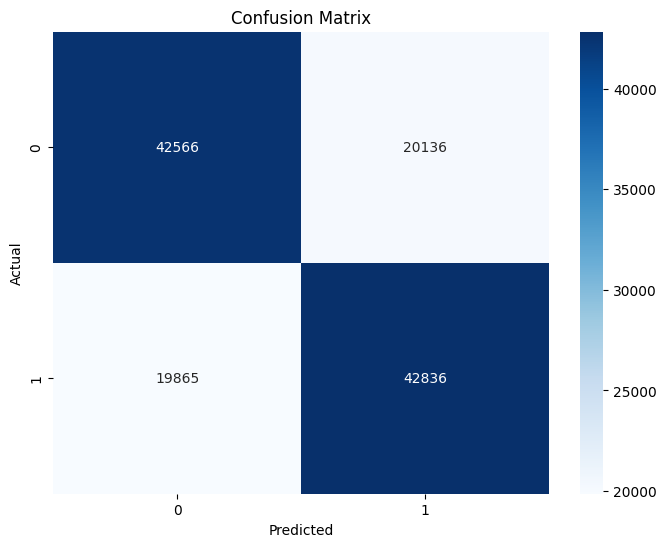

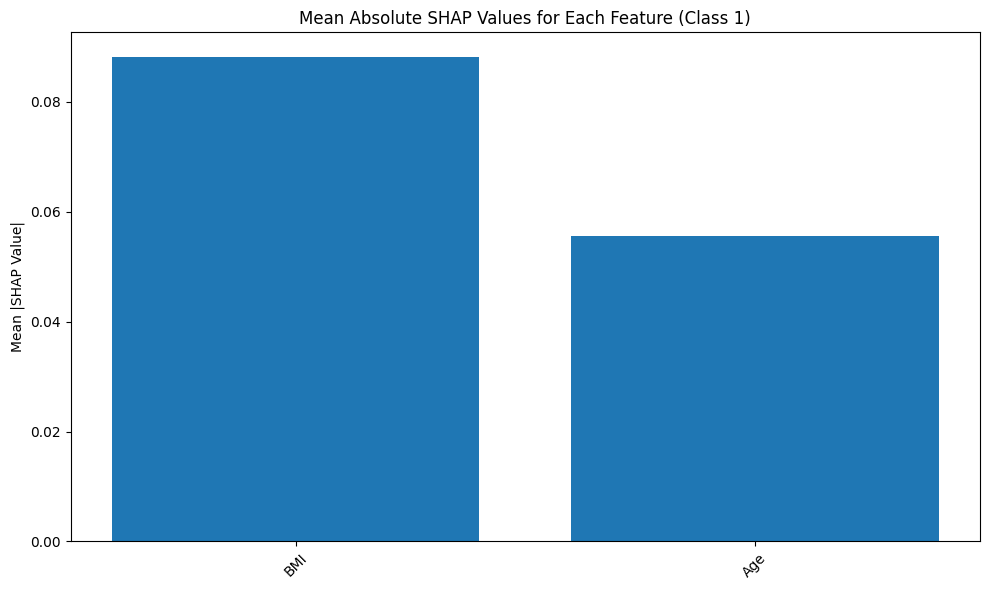

In [ ]:
# Encode the target labels into numeric form (e.g., 0 and 1), even if already numeric, for consistency
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)  # Should be 2 for binary classification

# Scale the features to have mean=0 and standard deviation=1, which improves neural network convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE (Synthetic Minority Oversampling Technique) to balance the classes
# This generates synthetic samples for the minority class to prevent bias toward the majority class
smote = SMOTE(random_state=42)
X_scaled, y_encoded = smote.fit_resample(X_scaled, y_encoded)

# Split the dataset into training (60%), validation (20%), and test (20%) sets
# Stratify ensures the class distribution remains consistent across all splits
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Convert NumPy arrays to PyTorch tensors for use in the neural network
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader objects to handle batching and shuffling during training and validation
batch_size = 32  # Number of samples per batch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle for better training
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ---------------------------
# 2. Define Neural Network Model
# ---------------------------
# This section defines a neural network architecture for predicting cancer diagnosis.

class CancerDiagnosisNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CancerDiagnosisNN, self).__init__()
        # First fully connected layer: maps input features to 256 neurons
        self.fc1 = nn.Linear(input_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization stabilizes training by normalizing activations
        self.dropout1 = nn.Dropout(0.3)  # Dropout (30%) randomly disables neurons to prevent overfitting

        # Second layer: reduces from 256 to 128 neurons
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)

        # Third layer: reduces from 128 to 64 neurons
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)

        # Fourth layer: reduces from 64 to 32 neurons
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.3)

        # Output layer: maps 32 neurons to the number of classes (2 for binary classification)
        self.out = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()  # ReLU activation introduces non-linearity between layers

    def forward(self, x):
        # Forward pass through the network
        x = self.relu(self.bn1(self.fc1(x)))  # First layer with ReLU, normalization, and dropout
        x = self.dropout1(x)
        x = self.relu(self.bn2(self.fc2(x)))  # Second layer
        x = self.dropout2(x)
        x = self.relu(self.bn3(self.fc3(x)))  # Third layer
        x = self.dropout3(x)
        x = self.relu(self.bn4(self.fc4(x)))  # Fourth layer
        x = self.dropout4(x)
        x = self.out(x)  # Output layer (raw scores, no softmax as CrossEntropyLoss applies it)
        return x

# Initialize the model with the number of input features and output classes
input_dim = X_train.shape[1]  # Number of feature columns
model = CancerDiagnosisNN(input_dim, num_classes)

# ---------------------------
# 3. Training with Hyperparameter Tuning
# ---------------------------
# This section trains the model, experimenting with different learning rates to optimize performance.

# Define a list of learning rates to test
learning_rates = [0.01, 0.001, 0.0001]
best_accuracy = 0  # Track the highest test accuracy achieved
best_model = None  # Store the model with the best performance

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = CancerDiagnosisNN(input_dim, num_classes)  # Reinitialize model for each learning rate
    criterion = nn.CrossEntropyLoss()  # Loss function suitable for classification tasks
    optimizer = optim.Adam(model.parameters(), lr=lr)  # Adam optimizer adjusts weights efficiently
    # Learning rate scheduler reduces lr if validation loss plateaus
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

    epochs = 100  # Maximum number of training iterations
    patience = 10  # Number of epochs to wait for improvement before stopping
    best_val_loss = np.inf  # Track the lowest validation loss
    patience_counter = 0  # Counter for early stopping
    train_losses = []  # Store training loss for each epoch
    val_losses = []    # Store validation loss for each epoch

    for epoch in range(epochs):
        model.train()  # Set model to training mode (enables dropout and batch norm)
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()  # Reset gradients to zero
            outputs = model(X_batch)  # Forward pass: compute predictions
            loss = criterion(outputs, y_batch)  # Calculate loss
            loss.backward()  # Backpropagation: compute gradients
            optimizer.step()  # Update model weights
            running_loss += loss.item() * X_batch.size(0)  # Accumulate loss for the epoch
        epoch_train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # Validation phase to monitor performance on unseen data
        model.eval()  # Set model to evaluation mode (disables dropout and batch norm)
        running_val_loss = 0.0
        with torch.no_grad():  # Disable gradient computation during validation
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                running_val_loss += loss.item() * X_batch.size(0)
        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        val_losses.append(epoch_val_loss)

        # Adjust learning rate based on validation loss
        scheduler.step(epoch_val_loss)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

        # Early stopping: stop training if validation loss doesn't improve
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_state = model.state_dict()  # Save the best model weights
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    # Load the best weights for this learning rate
    model.load_state_dict(best_model_state)

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        _, y_test_pred = torch.max(test_outputs, 1)  # Get the predicted class (highest score)
        y_test_pred = y_test_pred.numpy()

    # Compute test accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy with lr={lr}: {accuracy:.4f}")

    # Update best model if current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_lr = lr

print(f"\nBest learning rate: {best_lr} with accuracy: {best_accuracy:.4f}")
model = best_model  # Set the model to the best-performing one

# ---------------------------
# 4. Final Model Evaluation
# ---------------------------
# This section assesses the best model's performance on the test set with various metrics.

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, y_test_pred = torch.max(test_outputs, 1)  # Predict classes from output scores
    y_test_pred = y_test_pred.numpy()

# Calculate and print test accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Final Test Accuracy:", accuracy)

# Generate a classification report with precision, recall, and F1-score for each class
target_names = [str(c) for c in label_encoder.classes_]  # Convert class labels to strings
print(classification_report(y_test, y_test_pred, target_names=target_names))

# Plot a confusion matrix to visualize true vs. predicted labels
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Advanced SHAP Analysis with Custom Bar Plot for Feature Importance
# ---------------------------
# Instead of shap.summary_plot, we compute mean absolute SHAP values and create a bar plot.
# Use a subset from the validation set as background for the DeepExplainer.
X_val_sample = X_val_tensor[:100]
explainer_adv = shap.GradientExplainer(model, X_val_sample)

# Compute SHAP values for a subset (first 100 samples) of the test set.
# For binary classification, DeepExplainer returns a list of arrays (one per class).
shap_values_adv = explainer_adv.shap_values(X_test_tensor[:100])

# We'll use the SHAP values for class 1 (the positive class) for analysis.
shap_vals_class1 = shap_values_adv[1]

# Compute mean absolute SHAP values for each feature.
mean_abs_shap = np.mean(np.abs(shap_vals_class1), axis=0)

# Create a bar plot of the mean absolute SHAP values.
features = np.array(feature_cols)
indices = np.argsort(mean_abs_shap)[::-1]  # Sort in descending order

plt.figure(figsize=(10, 6))
plt.title("Mean Absolute SHAP Values for Each Feature (Class 1)")
plt.bar(range(len(mean_abs_shap)), mean_abs_shap[indices], align="center")
plt.xticks(range(len(mean_abs_shap)), features[indices], rotation=45)
plt.ylabel("Mean |SHAP Value|")
plt.tight_layout()
plt.show()

#import shap
#import torch

# Set device (use 'cuda' if GPU is available and preferred)
#device = 'cpu'
#model = model.to(device)
#model.eval()  # Set to evaluation mode

# Prepare validation and test samples
##X_val_sample = X_val_tensor[:100].to(device).requires_grad_()
#X_test_sample = X_test_tensor[:100].to(device)

# Verify shapes
#print(f"Validation sample shape: {X_val_sample.shape}")
#print(f"Test sample shape: {X_test_sample.shape}")

# Initialize SHAP DeepExplainer
#explainer = shap.DeepExplainer(model, X_val_sample)

# Compute SHAP values
#shap_values = explainer.shap_values(X_test_sample)

#print("Shape of shap_values[1]:", shap_values[1].shape)
#print("Shape of X_test_sample:", X_test_sample.cpu().numpy().shape)

# Convert to NumPy for plotting
#X_test_np = X_test_sample.cpu().numpy()

# Generate summary plot for class 1
#shap.summary_plot(shap_values[1], X_test_np, feature_names=feature_cols)

#with torch.no_grad():
    #output = model(X_test_sample)
    #print("Model output shape:", output.shape)

# Plot SHAP summary for class 1 (Cancer)
#shap.summary_plot(shap_values[1], X_test_sample.cpu().numpy(), feature_names=feature_cols)



# ---------------------------
# 5. SHAP Analysis for Interpretability
# ---------------------------
# This section uses SHAP values to explain how features influence the model's predictions.

# Use a sample of validation data to compute baseline SHAP values (explaining typical model behavior)
#X_val_sample = X_val_tensor[:100].requires_grad_()

# Initialize SHAP DeepExplainer to analyze the neural network
#explainer = shap.GradientExplainer(model, X_val_sample)

# Compute SHAP values for a subset of test data to understand feature contributions
#shap_values = explainer.shap_values(X_test_tensor[:100])

# Plot a SHAP summary to show the impact of each feature on predictions
# Positive SHAP values push the prediction toward class 1 (Cancer), negative toward 0 (No Cancer)
#shap.summary_plot(shap_values, X_test[:100], feature_names=feature_cols)